In [1]:
#Dataset
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read in csv data
prot_data = pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
clin_data_original = pd.read_csv("clinical_data_breast_cancer.csv",index_col = "Complete TCGA ID")

In [2]:
#Table of frequencies of target values
print "Number of Samples in Clinical Data:", len(pd.DataFrame(clin_data_original['AJCC Stage']))

freq_target_variable = pd.DataFrame(clin_data_original['AJCC Stage'].value_counts(ascending=True))
freq_target_variable.columns = ['Frequency']
freq_target_variable

Number of Samples in Clinical Data: 105


,Frequency
Stage IV,2
Stage IB,2
Stage I,3
Stage III,3
Stage IIIC,6
Stage IIIB,6
Stage IA,7
Stage II,11
Stage IIIA,12
Stage IIB,23


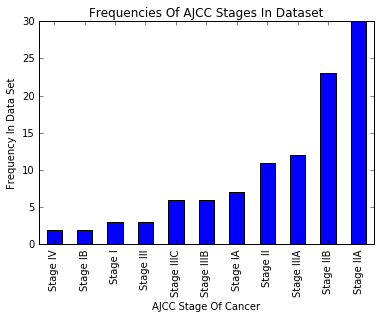

In [3]:
#Plot frequencies of target categories
freq_stage_raw = clin_data_original['AJCC Stage'].value_counts(ascending=True)

freq_stage_raw = freq_stage_raw.plot(kind='bar')
freq_stage_raw.set_xlabel("AJCC Stage Of Cancer")
freq_stage_raw.set_ylabel("Frequency In Data Set")
freq_stage_raw.set_title("Frequencies Of AJCC Stages In Dataset")

In [4]:
#Description of protein data, overall statistics on proteins of each patient.
print "Number Of Samples in Protein Data:", len(prot_data.columns)

prot_data.describe().round(2)

Number Of Samples in Protein Data: 86


,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
count,11334.00,11335.00,11334.00,12024.00,12025.00,11833.00,11833.00,11732.00,11732.00,11276.00,...,11477.00,10324.00,10324.00,10324.00,9694.00,9693.00,9697.00,10912.00,10885.00,10913.00
mean,0.13,0.13,-0.44,-0.73,-0.04,0.12,-0.62,-0.31,-0.02,0.08,...,-0.68,-0.10,-0.02,-0.10,0.49,-0.37,-0.05,0.07,-0.30,0.31
std,1.73,1.58,1.63,2.42,1.35,1.65,2.28,1.57,1.65,1.75,...,2.02,1.57,1.66,1.63,1.66,1.45,1.72,1.95,1.31,1.71
min,-12.47,-13.16,-9.91,-24.55,-15.00,-12.96,-16.64,-18.71,-14.71,-13.44,...,-12.50,-12.15,-11.87,-11.13,-8.77,-10.43,-12.97,-12.61,-9.06,-6.33
25%,-0.66,-0.58,-1.33,-1.27,-0.67,-0.68,-1.28,-0.99,-0.72,-0.73,...,-1.73,-0.82,-0.74,-0.81,-0.50,-1.06,-0.93,-0.87,-1.06,-0.65
50%,0.08,0.12,-0.32,-0.30,0.02,0.09,-0.16,-0.23,0.04,0.05,...,-0.44,-0.06,0.02,-0.04,0.31,-0.20,-0.08,0.05,-0.19,0.14
75%,0.91,0.85,0.49,0.45,0.72,0.93,0.67,0.48,0.75,0.86,...,0.50,0.66,0.80,0.71,1.28,0.52,0.76,1.01,0.57,1.06
max,17.62,12.68,8.29,11.79,6.93,10.60,10.08,8.80,9.55,13.07,...,8.84,10.69,11.31,12.64,11.16,7.89,11.52,16.18,6.44,10.50


In [5]:
#find decriptions of proteins overall
#read the table row first, for example the mean of the standard deviations would be row mean and column std
prot_data.describe().transpose().describe().round(2)

,count,mean,std,min,25%,50%,75%,max
count,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00
mean,11238.78,-0.20,1.74,-14.03,-0.95,-0.08,0.71,10.41
std,472.24,0.33,0.26,3.13,0.36,0.19,0.18,2.19
min,9693.00,-1.49,1.31,-24.55,-2.91,-0.95,0.27,6.44
25%,10949.50,-0.35,1.57,-15.40,-1.06,-0.19,0.58,8.76
50%,11280.00,-0.11,1.67,-13.60,-0.87,-0.04,0.71,10.08
75%,11515.50,-0.00,1.87,-12.11,-0.74,0.03,0.83,11.78
max,12025.00,0.49,2.54,-6.33,-0.50,0.31,1.28,17.62


In [6]:
#create copy of protein and process it to have a single gene column to use as an index.
prot_data['gene_symbol'].fillna("NA",inplace = True)
prot_data['gene'] = prot_data['RefSeq_accession_number'] + " - " + prot_data['gene_name'].map(str) + " - " + \
                    prot_data['gene_symbol']
prot_data = prot_data.set_index('gene')
prot_data = prot_data.drop(['gene_name','gene_symbol','RefSeq_accession_number'],1)

#drop missing data rows, and transpose data to line up with clin_data
prot_data_reduced = prot_data.dropna(axis = 0)
prot_data_reduced = prot_data_reduced.transpose()

#change naming of prot_data index to line up with clin_data. Move TCGA- to beginning, removing last 7 characters.
prot_data_reduced.index = pd.Series([val[10:14] + "-" + val[0:7]
                                     for val in prot_data_reduced.index], index = prot_data_reduced.index)
prot_data_reduced.index.rename("Complete TCGA ID",inplace = True)

#sort dataframe
prot_data_reduced = prot_data_reduced.sort_index()

In [7]:
#find decriptions of proteins overall for processed protein data
prot_data_reduced.transpose().describe().transpose().describe().round(2)

,count,mean,std,min,25%,50%,75%,max
count,83,83.00,83.00,83.00,83.00,83.00,83.00,83.00
mean,7994,-0.11,1.46,-11.63,-0.80,-0.05,0.65,8.44
std,0,0.20,0.15,2.25,0.21,0.12,0.13,1.70
min,7994,-0.86,1.08,-16.70,-1.87,-0.55,0.35,5.13
25%,7994,-0.22,1.36,-13.15,-0.86,-0.12,0.57,7.13
50%,7994,-0.11,1.48,-11.65,-0.76,-0.05,0.64,8.35
75%,7994,0.01,1.54,-10.23,-0.67,0.02,0.73,9.56
max,7994,0.39,1.91,-5.71,-0.52,0.23,1.14,13.22


In [8]:
#Discover duplicate patient identifiers
prot_data_reduced.index.value_counts().head()

TCGA-AO-A12B    2
TCGA-C8-A131    2
TCGA-AO-A12D    2
TCGA-AO-A0JC    1
TCGA-BH-A0DG    1
Name: Complete TCGA ID, dtype: int64

In [9]:
#renaming duplicate indexes and dropping them
for i in range(1,len(prot_data_reduced)):
    if prot_data_reduced.index[i] == prot_data_reduced.index[i-1]:  
        prot_range = prot_data_reduced.index.values
        prot_range[i] = prot_data_reduced.index[i] + "B"
        drop = prot_data_reduced.index[i] + "B"
        prot_data_reduced.set_index(prot_range)
        prot_data_reduced.drop([drop,0])

In [10]:
#check all duplicates dropped
prot_data_reduced.index.value_counts().head()

TCGA-AO-A0JC    1
TCGA-A2-A0EX    1
TCGA-A2-A0EV    1
TCGA-A8-A06N    1
PTAC-263d3f-    1
Name: Complete TCGA ID, dtype: int64

In [11]:
#Clinical data description
clin_data_original.describe().round(2)

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
count,105.00,105.00,11.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00
mean,58.69,788.39,1254.45,0.10,817.65,-4.89,-7.18,4.00,3.34,2.59,2.74,1.98,2.35
std,13.07,645.28,678.05,0.31,672.03,3.56,5.02,1.59,1.41,1.34,1.07,0.97,1.09
min,30.00,0.00,160.00,0.00,0.00,-12.00,-13.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,49.00,240.00,947.50,0.00,240.00,-6.00,-12.00,3.00,2.00,1.00,2.00,1.00,1.00
50%,58.00,643.00,1364.00,0.00,665.00,-5.00,-6.00,4.00,4.00,3.00,3.00,2.00,2.00
75%,67.00,1288.00,1627.50,0.00,1305.00,-3.00,-2.00,5.00,4.00,3.00,4.00,3.00,3.00
max,88.00,2850.00,2483.00,1.00,2850.00,0.00,0.00,7.00,5.00,5.00,4.00,4.00,5.00


In [12]:
#remove clin_data column with NAs
clin_data_original = clin_data_original.dropna(axis = 1)

In [13]:
clin_data_original.describe().round(2)

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
count,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00
mean,58.69,788.39,0.10,817.65,-4.89,-7.18,4.00,3.34,2.59,2.74,1.98,2.35
std,13.07,645.28,0.31,672.03,3.56,5.02,1.59,1.41,1.34,1.07,0.97,1.09
min,30.00,0.00,0.00,0.00,-12.00,-13.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,49.00,240.00,0.00,240.00,-6.00,-12.00,3.00,2.00,1.00,2.00,1.00,1.00
50%,58.00,643.00,0.00,665.00,-5.00,-6.00,4.00,4.00,3.00,3.00,2.00,2.00
75%,67.00,1288.00,0.00,1305.00,-3.00,-2.00,5.00,4.00,3.00,4.00,3.00,3.00
max,88.00,2850.00,1.00,2850.00,0.00,0.00,7.00,5.00,5.00,4.00,4.00,5.00


In [14]:
#combine protein data and clinical data to ensure matched indexes and get rid of protein patients without clinical
#info
combined_table = clin_data_original.join(prot_data_reduced)

In [15]:
#check for rows in clinical data without protein data
combined_table.describe().round(2)

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),...,NP_001652 - ADP-ribosylation factor-like protein 4D - ARL4D,NP_071753 - potassium channel subfamily K member 15 precursor - NA,"NP_001294 - protoheme IX farnesyltransferase, mitochondrial - COX10",NP_065775 - RING finger protein 150 precursor - RNF150,NP_001094348 - maestro heat-like repeat-containing protein family member 6 - C8ORF73,XP_003846524 - PREDICTED: ADP-ribosylation factor-like protein 17-like - NA,NP_443073 - testis-specific serine/threonine-protein kinase 3 - TSSK3,NP_001004456 - olfactory receptor 1M1 - OR1M1,NP_997625 - ADP-ribosylation factor-like protein 4A - ARL4A,"NP_003270 - troponin C, skeletal muscle - TNNC2"
count,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,105.00,...,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,58.69,788.39,0.10,817.65,-4.89,-7.18,4.00,3.34,2.59,2.74,...,0.53,0.56,0.52,0.30,0.19,-1.25,0.27,0.46,0.19,0.11
std,13.07,645.28,0.31,672.03,3.56,5.02,1.59,1.41,1.34,1.07,...,2.05,2.16,2.31,2.54,2.41,2.54,1.22,2.34,1.89,2.05
min,30.00,0.00,0.00,0.00,-12.00,-13.00,1.00,1.00,1.00,1.00,...,-7.06,-5.37,-6.73,-7.76,-6.97,-8.72,-4.21,-4.99,-7.20,-9.66
25%,49.00,240.00,0.00,240.00,-6.00,-12.00,3.00,2.00,1.00,2.00,...,-0.56,-0.65,-0.20,-1.19,-1.01,-3.53,-0.18,-1.45,-0.57,-0.49
50%,58.00,643.00,0.00,665.00,-5.00,-6.00,4.00,4.00,3.00,3.00,...,1.17,0.51,1.07,0.57,0.36,-0.46,0.39,0.71,0.46,0.64
75%,67.00,1288.00,0.00,1305.00,-3.00,-2.00,5.00,4.00,3.00,4.00,...,1.93,1.88,2.04,1.78,1.86,0.81,0.99,2.35,1.43,1.39
max,88.00,2850.00,1.00,2850.00,0.00,0.00,7.00,5.00,5.00,4.00,...,3.57,5.48,4.34,6.78,4.71,2.90,3.26,4.62,3.39,2.49


In [16]:
#drop these rows
combined_table = combined_table.dropna(axis = 0)

In [17]:
#Counts of each column now match
combined_table.describe().round(2)

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),...,NP_001652 - ADP-ribosylation factor-like protein 4D - ARL4D,NP_071753 - potassium channel subfamily K member 15 precursor - NA,"NP_001294 - protoheme IX farnesyltransferase, mitochondrial - COX10",NP_065775 - RING finger protein 150 precursor - RNF150,NP_001094348 - maestro heat-like repeat-containing protein family member 6 - C8ORF73,XP_003846524 - PREDICTED: ADP-ribosylation factor-like protein 17-like - NA,NP_443073 - testis-specific serine/threonine-protein kinase 3 - TSSK3,NP_001004456 - olfactory receptor 1M1 - OR1M1,NP_997625 - ADP-ribosylation factor-like protein 4A - ARL4A,"NP_003270 - troponin C, skeletal muscle - TNNC2"
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,...,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,58.91,846.53,0.09,870.88,-4.66,-7.23,4.03,3.42,2.58,2.78,...,0.53,0.56,0.52,0.30,0.19,-1.25,0.27,0.46,0.19,0.11
std,13.41,692.00,0.29,717.15,3.43,5.01,1.59,1.35,1.34,1.05,...,2.05,2.16,2.31,2.54,2.41,2.54,1.22,2.34,1.89,2.05
min,30.00,0.00,0.00,0.00,-12.00,-13.00,1.00,1.00,1.00,1.00,...,-7.06,-5.37,-6.73,-7.76,-6.97,-8.72,-4.21,-4.99,-7.20,-9.66
25%,50.00,230.00,0.00,230.00,-5.00,-12.00,3.00,2.00,1.00,2.00,...,-0.56,-0.65,-0.20,-1.19,-1.01,-3.53,-0.18,-1.45,-0.57,-0.49
50%,59.00,769.00,0.00,769.00,-5.00,-6.00,4.00,4.00,3.00,3.00,...,1.17,0.51,1.07,0.57,0.36,-0.46,0.39,0.71,0.46,0.64
75%,67.00,1319.00,0.00,1364.00,-3.00,-2.00,5.00,4.00,3.00,4.00,...,1.93,1.88,2.04,1.78,1.86,0.81,0.99,2.35,1.43,1.39
max,88.00,2850.00,1.00,2850.00,0.00,0.00,7.00,5.00,5.00,4.00,...,3.57,5.48,4.34,6.78,4.71,2.90,3.26,4.62,3.39,2.49


In [18]:
#interesting columns for reference
target_column = ['AJCC Stage']
subtarget_columns = ['Metastasis','Tumor','Node']
other_clusterings = ['miRNA Clusters']

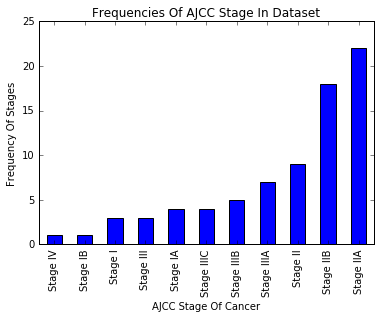

In [19]:
#reduced dataset categories
freq_stage_processed = combined_table['AJCC Stage'].value_counts(ascending=True)

freq_stage_processed = freq_stage_processed.plot(kind='bar')
freq_stage_processed.set_xlabel('AJCC Stage Of Cancer')
freq_stage_processed.set_ylabel('Frequency Of Stages')
freq_stage_processed.set_title('Frequencies Of AJCC Stage In Dataset')

In [20]:
#reduce subclasses to classes in AJCC Stage
combined_table['AJCC Stage Classes'] = pd.Series([val.replace("B","").replace("A","").replace("C","") 
                                                  for val in combined_table['AJCC Stage']], 
                                                  index = combined_table.index)

In [21]:
freq_target_variable['Frequency Without Subdivisions'] = combined_table['AJCC Stage Classes'].value_counts()
freq_target_variable.fillna("-",inplace=True)
freq_target_variable.sort_index()

,Frequency,Frequency Without Subdivisions
Stage I,3,8
Stage IA,7,-
Stage IB,2,-
Stage II,11,49
Stage IIA,30,-
Stage IIB,23,-
Stage III,3,19
Stage IIIA,12,-
Stage IIIB,6,-
Stage IIIC,6,-


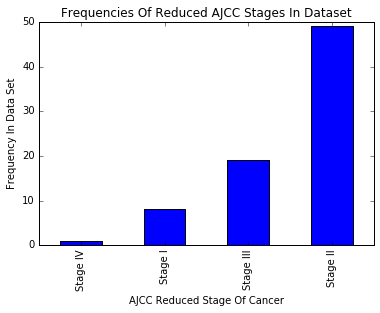

In [22]:
#AJCC Stage Classes
freq_reduced_stage_processed = combined_table['AJCC Stage Classes'].value_counts(ascending=True)

freq_reduced_stage_processed = freq_reduced_stage_processed.plot(kind='bar')
freq_reduced_stage_processed.set_xlabel("AJCC Reduced Stage Of Cancer")
freq_reduced_stage_processed.set_ylabel("Frequency In Data Set")
freq_reduced_stage_processed.set_title("Frequencies Of Reduced AJCC Stages In Dataset")

In [23]:
#under-represented subclasses (those with one entry)
print combined_table['AJCC Stage'][combined_table['AJCC Stage'] == "Stage IV"]
print combined_table['AJCC Stage'][combined_table['AJCC Stage'] == "Stage IB"]

Complete TCGA ID
TCGA-A2-A0SW    Stage IV
Name: AJCC Stage, dtype: object
Complete TCGA ID
TCGA-C8-A12U    Stage IB
Name: AJCC Stage, dtype: object


In [24]:
#dropping these as potential outliers
combined_table.drop("TCGA-A2-A0SW", axis = 0, inplace = True)
combined_table.drop("TCGA-C8-A12U", axis = 0, inplace = True)

Frequency Of Target Classes
Stage I       7
Stage III    19
Stage II     49
Name: AJCC Stage Classes, dtype: int64


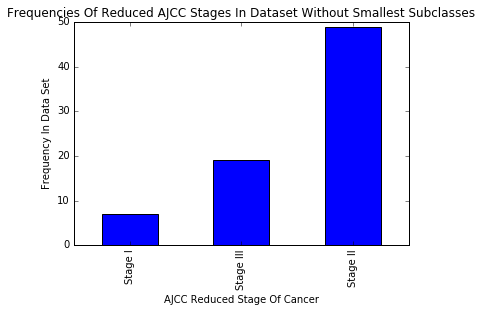

In [25]:
print "Frequency Of Target Classes"
print combined_table['AJCC Stage Classes'].value_counts(ascending=True)

freq_reduced_stage_processed_cut = combined_table['AJCC Stage Classes'].value_counts(ascending=True)

freq_reduced_stage_processed_cut = freq_reduced_stage_processed_cut.plot(kind='bar')
freq_reduced_stage_processed_cut.set_xlabel("AJCC Reduced Stage Of Cancer")
freq_reduced_stage_processed_cut.set_ylabel("Frequency In Data Set")
freq_reduced_stage_processed_cut.set_title("Frequencies Of Reduced AJCC Stages In Dataset Without Smallest Subclasses")

In [26]:
#encoding target
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder().fit(combined_table['AJCC Stage Classes'])
combined_table['AJCC Stage Classes'] = lbl_enc.transform(combined_table['AJCC Stage Classes'])

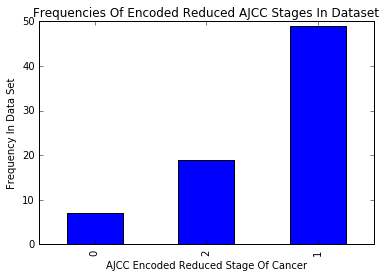

In [27]:
#Coded targets
freq_reduced_stage_encoded = combined_table['AJCC Stage Classes'].value_counts(ascending=True)

freq_reduced_stage_encoded = freq_reduced_stage_encoded.plot(kind='bar')
freq_reduced_stage_encoded.set_xlabel("AJCC Encoded Reduced Stage Of Cancer")
freq_reduced_stage_encoded.set_ylabel("Frequency In Data Set")
freq_reduced_stage_encoded.set_title("Frequencies Of Encoded Reduced AJCC Stages In Dataset")

In [28]:
#data columns
protein_columns = [val for val in combined_table.columns if "NP_" in val or "XP_" in val or "YP_" in val]
combined_table_proteins = combined_table[protein_columns]

In [29]:
#Data Splitting
from sklearn.model_selection import StratifiedShuffleSplit

def split_data(data,target,eval_size):
    kf = StratifiedShuffleSplit(n_splits = 1, test_size = eval_size, random_state = 0)
    for train_indice, valid_indice in kf.split(data,target):
        X_train, X_valid = data.iloc[train_indice], data.iloc[valid_indice]
        y_train, y_valid = target.iloc[train_indice],target.iloc[valid_indice]
    return X_train, y_train, X_valid, y_valid

In [30]:
#Dummy classifier for benchmark
from sklearn.dummy import DummyClassifier

def dummy_clf(val,score):
    X_train_prot, y_train_prot, X_valid_prot, y_valid_prot = split_data(combined_table_proteins,
                                                                        combined_table[val],0.35)
    dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train_prot,y_train_prot)
    score = score(y_valid_prot,dummy_clf.predict(X_valid_prot),average = 'weighted').round(2)
    return score

In [31]:
#import possible scoring metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hinge_loss
from sklearn.metrics import fbeta_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [32]:
#Dummy scores for targets and other categories of interest
exploriative = pd.DataFrame(index = target_column + subtarget_columns + other_clusterings + ['AJCC Stage Classes'])
exploriative['Unique Values'] = [len(combined_table[val].unique()) for val in exploriative.index]
exploriative['Mode'] = [combined_table[val].mode().iloc[0] for val in exploriative.index]
exploriative['Dummy Score'] = [dummy_clf(val,f1_score) for val in exploriative.index]
print exploriative

                    Unique Values       Mode  Dummy Score
AJCC Stage                      9  Stage IIA         0.14
Metastasis                      1         M0         1.00
Tumor                           4         T2         0.53
Node                            4         N0         0.35
miRNA Clusters                  7          4         0.20
AJCC Stage Classes              3          1         0.53


/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
#split data into train and test
X_train_prot, y_train_prot, X_valid_prot, y_valid_prot = split_data(combined_table_proteins,
                                                                    combined_table['AJCC Stage Classes'],0.35)

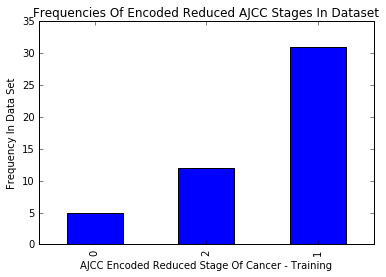

In [34]:
#Training set sizes
freq_reduced_stage_training_encoded = y_train_prot.value_counts(ascending=True)

freq_reduced_stage_training_encoded = freq_reduced_stage_training_encoded.plot(kind='bar')
freq_reduced_stage_training_encoded.set_xlabel("AJCC Encoded Reduced Stage Of Cancer - Training")
freq_reduced_stage_training_encoded.set_ylabel("Frequency In Data Set")
freq_reduced_stage_training_encoded.set_title("Frequencies Of Encoded Reduced AJCC Stages In Dataset")

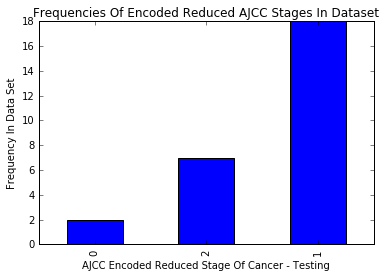

In [35]:
#Test set category sizes
freq_reduced_stage_testing_encoded = y_valid_prot.value_counts(ascending=True)

freq_reduced_stage_testing_encoded = freq_reduced_stage_testing_encoded.plot(kind='bar')
freq_reduced_stage_testing_encoded.set_xlabel("AJCC Encoded Reduced Stage Of Cancer - Testing")
freq_reduced_stage_testing_encoded.set_ylabel("Frequency In Data Set")
freq_reduced_stage_testing_encoded.set_title("Frequencies Of Encoded Reduced AJCC Stages In Dataset")

In [36]:
#train default algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier

rfc = RandomForestClassifier(random_state = 0)
xgb = XGBClassifier(seed = 0)
lgr = LogisticRegression(random_state = 0)
kmm = KMeans(random_state = 0)
svm = SVC(random_state = 0, probability = True)
gnb = GaussianNB()

In [37]:
rfc_trained = rfc.fit(X_train_prot,y_train_prot)
xgb_trained = xgb.fit(X_train_prot,y_train_prot)
lgr_trained = lgr.fit(X_train_prot,y_train_prot)
kmm_trained = kmm.fit(X_train_prot,y_train_prot)
gnb_trained = GaussianNB().fit(X_train_prot,y_train_prot)
svm_trained = svm.fit(X_train_prot,y_train_prot)

In [38]:
#Create Scoring Grid
models = ['Random Forest','Gradient Boosting','Logistic Regression','KMeans','Naive Bayes','Support Vector']
model_codes = [rfc_trained,xgb_trained,lgr_trained,kmm_trained,gnb_trained,svm_trained]
scores = [f1_score,accuracy_score,cohen_kappa_score,log_loss,"score",hinge_loss,fbeta_score,hamming_loss,
          precision_score,recall_score]
scoring_names = ['F1 Score','Accuracy','Kappa','Log Loss','Score','Hinge Loss','Fbeta Score','Hamming Loss',
                 'Precision','Recall Score']
scoring_grid = pd.DataFrame(index = models)

In [39]:
def create_scoring_grid(data,target,scoring_grid,models):
    for i in range(len(scores)):
        score = []
        for j in models:
            if (scores[i] == log_loss or scores[i] == hinge_loss):
                try:
                    score.append(scores[i](target,j.predict_proba(data)).round(2))
                except:
                    score.append("-")
            elif (scores[i] == f1_score or scores[i] == precision_score or scores[i] == recall_score):
                score.append(scores[i](target,j.predict(data),average = 'weighted').round(2))
            elif (scores[i] == fbeta_score):
                score.append(scores[i](target,j.predict(data),beta = 0.5,average = 'weighted').round(2))
            elif (scores[i] == "score"):
                try:
                    score.append(j.score(data,target).round(2))
                except:
                    pass
            else:
                score.append(scores[i](target,j.predict(data)).round(2))
        scoring_grid[scoring_names[i]] = score
    return scoring_grid
print create_scoring_grid(X_valid_prot,y_valid_prot,scoring_grid,model_codes)

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                     F1 Score  Accuracy  Kappa Log Loss      Score Hinge Loss  \
Random Forest            0.53      0.59  -0.03     3.23       0.59       0.91   
Gradient Boosting        0.47      0.52  -0.14     1.52       0.52       1.05   
Logistic Regression      0.39      0.41  -0.29     2.72       0.41       1.11   
KMeans                   0.14      0.15  -0.05        - -399630.90          -   
Naive Bayes              0.48      0.56  -0.17    15.35       0.56       0.89   
Support Vector           0.53      0.67   0.00     0.83       0.67       0.87   

                     Fbeta Score  Hamming Loss  Precision  Recall Score  
Random Forest               0.51          0.41       0.50          0.59  
Gradient Boosting           0.44          0.48       0.42          0.52  
Logistic Regression         0.37          0.59       0.37          0.41  
KMeans                      0.16          0.85       0.21          0.15  
Naive Bayes                 0.44          0.44       0.42     

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def evaluate(data_train,target_train,data_valid,target_valid,score,params,pipes):
    model_codes = []
    models_use = []
    try:
        rfc_tuned = GridSearchCV(pipes['rfc_pipe'],params['rfc_params'],
                                       scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(rfc_tuned)
        models_use.append("Random Forest")
    except:
        pass
    try:
        lgr_tuned = GridSearchCV(pipes['lgr_pipe'],params['lgr_params'],
                                       scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(lgr_tuned)
        models_use.append("Logistic Regression")
    except:
        pass
    try:
        kmm_tuned = GridSearchCV(pipes['kmm_pipe'],params['kmm_params'],
                                 scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(kmm_tuned)
        models_use.append("KMeans")
    except:
        pass
    try:
        svm_tuned = GridSearchCV(pipes['svm_pipe'],params['svm_params'],
                                       scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(svm_tuned)
        models_use.append("Support Vector")
    except:
        pass
    try:
        xgb_tuned = GridSearchCV(pipes['xgb_pipe'],params['xgb_params'],
                                 scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(xgb_tuned)
        models_use.append("XGBoost")
    except:
        pass
    try:
        gnb_tuned = GridSearchCV(pipes['gnb_pipe'],params['gnb_params'],
                                 scoring=score,cv=3).fit(data_train,target_train)
        model_codes.append(gnb_tuned)
        models_use.append("Naive Bayes")
    except:
        pass
    scoring_grid_tuned = pd.DataFrame(index = models_use)
    scoring_grid_tuned = create_scoring_grid(data_valid,target_valid,scoring_grid_tuned,model_codes)
    return scoring_grid_tuned, model_codes

In [41]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver = 'full', random_state = 0, n_components = 48)

pca_fitted = pca.fit(X_train_prot,y_train_prot)

X_train_pca = pca_fitted.transform(X_train_prot)
X_train_pca = pd.DataFrame(X_train_pca, index = X_train_prot.index)
X_valid_pca = pca_fitted.transform(X_valid_prot)
X_valid_pca = pd.DataFrame(X_valid_pca, index = X_valid_prot.index)

In [42]:
kbest_params = {'rfc_params':{},'xgb_params':{},'lgr_params':{},'kmm_params':{},'svm_params':{}, 'gnb_params':{}}

for i in kbest_params.values():
    i['kbest__k'] = range(1,49)

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline

kbest = SelectKBest(f_classif)

kbest_pca_rfc_pipe = Pipeline([('kbest',kbest),('rfc',rfc)])
kbest_pca_xgb_pipe = Pipeline([('kbest',kbest),('xgb',xgb)])
kbest_pca_lgr_pipe = Pipeline([('kbest',kbest),('lgr',lgr)])
kbest_pca_kmm_pipe = Pipeline([('kbest',kbest),('kmm',kmm)])
kbest_pca_svm_pipe = Pipeline([('kbest',kbest),('svm',svm)])
kbest_pca_gnb_pipe = Pipeline([('kbest',kbest),('gnb',gnb)])

kbest_pipes = {'rfc_pipe':kbest_pca_rfc_pipe,'xgb_pipe':kbest_pca_xgb_pipe,'lgr_pipe':kbest_pca_lgr_pipe,
               'kmm_pipe':kbest_pca_kmm_pipe,'svm_pipe':kbest_pca_svm_pipe,'gnb_pipe':kbest_pca_gnb_pipe}

In [44]:
#find optimum number of PCA features for each algorithm
kbest_pca_scoring_grid, kbest_pca_tuned = evaluate(X_train_pca,y_train_prot,X_valid_pca,y_valid_prot,'f1_weighted',
                                                   kbest_params,kbest_pipes)

In [45]:
#score and best number of features for each
features_chosen = []
cv_scores = []
tuning_cv_results = pd.DataFrame(index = kbest_pca_scoring_grid.index)
for i in kbest_pca_tuned:
    print i.best_params_
    features_chosen.append(i.best_params_['kbest__k'])
    cv_scores.append(i.best_score_.round(2))
tuning_cv_results['Initial Scores'] = cv_scores
print tuning_cv_results

{'kbest__k': 29}
{'kbest__k': 4}
{'kbest__k': 11}
{'kbest__k': 1}
{'kbest__k': 4}
{'kbest__k': 46}
                     Initial Scores
Random Forest                  0.60
Logistic Regression            0.58
KMeans                         0.42
Support Vector                 0.54
XGBoost                        0.58
Naive Bayes                    0.51


In [46]:
#testing set score
kbest_pca_scoring_grid.insert(0, 'K Chosen', features_chosen)
print kbest_pca_scoring_grid

                     K Chosen  F1 Score  Accuracy  Kappa Log Loss  Score  \
Random Forest              29      0.53      0.67   0.00      3.2   0.53   
Logistic Regression         4      0.55      0.59   0.00     0.87   0.55   
KMeans                     11      0.15      0.11  -0.12        -   0.15   
Support Vector              1      0.52      0.63  -0.04      0.9   0.52   
XGBoost                     4      0.66      0.70   0.28     1.35   0.66   
Naive Bayes                46      0.31      0.30  -0.22     1.34   0.31   

                    Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
Random Forest             0.88         0.48          0.33       0.44   
Logistic Regression       0.89         0.54          0.41       0.56   
KMeans                       -         0.20          0.89       0.25   
Support Vector            0.96         0.46          0.37       0.44   
XGBoost                   0.68         0.65          0.30       0.64   
Naive Bayes               1.17     

In [47]:
#create feature sets for each algorithm
X_train_kbest_rfc = kbest_pca_tuned[0].best_estimator_.steps[0][1].transform(X_train_pca)
X_train_kbest_lgr = kbest_pca_tuned[1].best_estimator_.steps[0][1].transform(X_train_pca)
X_train_kbest_kmm = kbest_pca_tuned[2].best_estimator_.steps[0][1].transform(X_train_pca)
X_train_kbest_svm = kbest_pca_tuned[3].best_estimator_.steps[0][1].transform(X_train_pca)
X_train_kbest_xgb = kbest_pca_tuned[4].best_estimator_.steps[0][1].transform(X_train_pca)
X_valid_kbest_rfc = kbest_pca_tuned[0].best_estimator_.steps[0][1].transform(X_valid_pca)
X_valid_kbest_lgr = kbest_pca_tuned[1].best_estimator_.steps[0][1].transform(X_valid_pca)
X_valid_kbest_kmm = kbest_pca_tuned[2].best_estimator_.steps[0][1].transform(X_valid_pca)
X_valid_kbest_svm = kbest_pca_tuned[3].best_estimator_.steps[0][1].transform(X_valid_pca)
X_valid_kbest_xgb = kbest_pca_tuned[4].best_estimator_.steps[0][1].transform(X_valid_pca)

In [48]:
#tune XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,seed=0)
xgb_params_cv = {"xgb__n_estimators": range(1,1201)}
params = {'xgb_params':xgb_params_cv}
pipe = {'xgb_pipe':Pipeline([('xgb',xgb)])}
scorer = make_scorer(cohen_kappa_score)

tuned_scoring_grid, tuned = evaluate(X_train_kbest_xgb,y_train_prot,X_valid_kbest_xgb,y_valid_prot,'f1_weighted',
                                             params,pipe)

#test set scoring grid for reference
print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 1'] = ["-","-","-","-",tuned[0].best_score_.round(2),"-"]
print tuning_cv_results

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.81   0.66        0.67         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  
0.635280078215
{'xgb__n_estimators': 670}
                     Initial Scores Tuning Stage 1
Random Forest                  0.60              -
Logistic Regression            0.58              -
KMeans                         0.42              -
Support Vector                 0.54              -
XGBoost                        0.58           0.64
Naive Bayes                    0.51              -


In [49]:
xgb = XGBClassifier(learning_rate=0.1,n_estimators=670,seed=0)
xgb_params_cv = {"xgb__max_depth": range(1,30),"xgb__min_child_weight": range(1,10)}
params = {'xgb_params':xgb_params_cv}

pipe = {'xgb_pipe':Pipeline([('xgb',xgb)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_xgb,y_train_prot,X_valid_kbest_xgb,y_valid_prot,'f1_weighted',
                                     params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 2'] = ["-","-","-","-",tuned[0].best_score_.round(2),"-"]
print tuning_cv_results

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.71   0.66        0.71         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  
0.670468923186
{'xgb__min_child_weight': 2, 'xgb__max_depth': 3}
                     Initial Scores Tuning Stage 1 Tuning Stage 2
Random Forest                  0.60              -              -
Logistic Regression            0.58              -              -
KMeans                         0.42              -              -
Support Vector                 0.54              -              -
XGBoost                        0.58           0.64           0.67
Naive Bayes                    0.51              -              -


In [50]:
xgb = XGBClassifier(learning_rate=0.1,n_estimators=670,max_depth=3,min_child_weight=2,seed=0)
xgb_params_cv = {'xgb__gamma': [i/10.0 for i in range(0,5)]}
params = {'xgb_params':xgb_params_cv}
pipe = {'xgb_pipe':Pipeline([('xgb',xgb)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_xgb,y_train_prot,X_valid_kbest_xgb,y_valid_prot,'f1_weighted',
                                     params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 3'] = ["-","-","-","-",tuned[0].best_score_.round(2),"-"]
print tuning_cv_results

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.71   0.66        0.71         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  
0.670468923186
{'xgb__gamma': 0.0}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60              -              -   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3  
Random Forest                    -  
Logistic Regression              -  
KMeans                           -  
Support Vector                   -  
XGBoost                       0.67  


In [51]:
xgb = XGBClassifier(learning_rate=0.1,n_estimators=670,max_depth=3,min_child_weight=2,gamma=0.0,seed=0)
xgb_params_cv = {"xgb__subsample": [i for i in range(1,11)],
                 "xgb__colsample_bytree": [i for i in range(1,11)]}
params = {'xgb_params':xgb_params_cv}

pipe = {'xgb_pipe':Pipeline([('xgb',xgb)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_xgb,y_train_prot,X_valid_kbest_xgb,y_valid_prot,'f1_weighted',
                                     params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_ 
    
tuning_cv_results['Tuning Stage 4'] = ["-","-","-","-",tuned[0].best_score_.round(2),"-"]
print tuning_cv_results

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.71   0.66        0.71         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  
0.670468923186
{'xgb__colsample_bytree': 1, 'xgb__subsample': 1}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60              -              -   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4  
Random Forest                    -              -  
Logistic Regression              -              -  
KMeans                           -  

In [52]:
xgb = XGBClassifier(learning_rate=0.05,max_depth=3,min_child_weight=2,gamma=0.0,seed=0,subsample=1,colsample_bytree=1)
xgb_params_cv = {'xgb__n_estimators':range(1,1200)}
params = {'xgb_params':xgb_params_cv}
pipe = {'xgb_pipe':Pipeline([('xgb',xgb)])}

xgb_tuned_scoring_grid, xgb_tuned = evaluate(X_train_kbest_xgb,y_train_prot,X_valid_kbest_xgb,y_valid_prot,
                                             'f1_weighted',params,pipe)

print xgb_tuned_scoring_grid

for i in xgb_tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 5'] = ["-","-","-","-",xgb_tuned[0].best_score_.round(2),"-"]
print tuning_cv_results

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.65   0.66        0.71         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  
0.693466758684
{'xgb__n_estimators': 850}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60              -              -   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                    -              -              -  
Logistic Regression              -              -              -  
KMeans        

In [53]:
for i in xgb_tuned:
    xgb_tuned_params = i.best_estimator_.steps[0][1]
print xgb_tuned_params

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0.0,
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=2, n_estimators=850, nthread=-1,
       objective='multi:softprob', seed=0, silent=True, subsample=1)


In [54]:
#Final Classifier test set scores
xgb_final_classifier = xgb_tuned[0]
final_models_use = ['XGBoost']
final_models = [xgb_final_classifier]
final_classifier_scores = pd.DataFrame(index = final_models_use)
final_test_scores = create_scoring_grid(X_valid_kbest_xgb,y_valid_prot,final_classifier_scores,final_models)
print final_test_scores

         F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  Fbeta Score  \
XGBoost      0.66       0.7   0.28      1.65   0.66        0.71         0.65   

         Hamming Loss  Precision  Recall Score  
XGBoost           0.3       0.64           0.7  


In [55]:
#tune model 2, random forest
rfc = RandomForestClassifier(random_state=0)
rfc_params_cv = {'rfc__n_estimators':range(100,200)}
params = {'rfc_params':rfc_params_cv}
pipe = {'rfc_pipe':Pipeline([('rfc',rfc)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_rfc,y_train_prot,X_valid_kbest_rfc,
                                                          y_valid_prot,'f1_weighted',params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 1']['Random Forest'] = tuned[0].best_score_.round(2)
print tuning_cv_results

               F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Random Forest      0.53      0.67      0      0.92   0.53        0.83   

               Fbeta Score  Hamming Loss  Precision  Recall Score  
Random Forest         0.48          0.33       0.44          0.67  
0.506982600733
{'rfc__n_estimators': 103}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51              -   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                    -              -              -  
Logistic Regression              -              -        

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
rfc = RandomForestClassifier(random_state=0,n_estimators=103)
rfc_params_cv = {'rfc__max_features':["sqrt",None,'auto',0.2],
                 'rfc__min_samples_leaf':range(1,11)}
params = {'rfc_params':rfc_params_cv}
pipe = {'rfc_pipe':Pipeline([('rfc',rfc)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_rfc,y_train_prot,X_valid_kbest_rfc,
                                                          y_valid_prot,'f1_weighted',params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 2']['Random Forest'] = tuned[0].best_score_.round(2)
print tuning_cv_results

               F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Random Forest      0.58      0.67   0.08      1.12   0.58        0.76   

               Fbeta Score  Hamming Loss  Precision  Recall Score  
Random Forest         0.57          0.33       0.58          0.67  
0.536728395062
{'rfc__max_features': None, 'rfc__min_samples_leaf': 1}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                    -              -              -  
Logistic Regression         

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [57]:
rfc = RandomForestClassifier(random_state=0,n_estimators=103,max_features=None,min_samples_leaf=1)
rfc_params_cv = {'rfc__min_samples_split':range(1,11),
                 'rfc__max_depth':range(1,11)}
params = {'rfc_params':rfc_params_cv}
pipe = {'rfc_pipe':Pipeline([('rfc',rfc)])}

rfc_tuned_scoring_grid, rfc_tuned= evaluate(X_train_kbest_rfc,y_train_prot,X_valid_kbest_rfc,y_valid_prot,
                                            'f1_weighted',params,pipe)

print rfc_tuned_scoring_grid

for i in rfc_tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 3']['Random Forest'] = tuned[0].best_score_.round(2)
print tuning_cv_results

               F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Random Forest      0.58      0.67   0.08      1.03   0.58        0.77   

               Fbeta Score  Hamming Loss  Precision  Recall Score  
Random Forest         0.57          0.33       0.58          0.67  
0.57075617284
{'rfc__min_samples_split': 7, 'rfc__max_depth': 3}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58              -              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                 0.54              -              -  
Logistic Regression              -

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
for i in rfc_tuned:
    rfc_best_params = i.best_estimator_.steps[0][1]
print rfc_best_params

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=103, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [59]:
#Final Classifier 
rfc_final_classifier = rfc_tuned[0]
final_models_use = ['Random Forest Classifier']
final_models = [rfc_final_classifier]
final_classifier_scores = pd.DataFrame(index = final_models_use)
scoring_temp = create_scoring_grid(X_valid_kbest_rfc,y_valid_prot,final_classifier_scores,final_models)
final_test_scores = pd.concat([final_test_scores,scoring_temp])
print final_test_scores

                          F1 Score  Accuracy  Kappa  Log Loss  Score  \
XGBoost                       0.66      0.70   0.28      1.65   0.66   
Random Forest Classifier      0.58      0.67   0.08      1.03   0.58   

                          Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
XGBoost                         0.71         0.65          0.30       0.64   
Random Forest Classifier        0.77         0.57          0.33       0.58   

                          Recall Score  
XGBoost                           0.70  
Random Forest Classifier          0.67  


In [60]:
#train model 3, logistic regression
lgr = LogisticRegression(random_state=0,class_weight='balanced')
lgr_params_cv = {'lgr__penalty':['l1','l2'],
                 "lgr__C":[0.7,0.8,0.9,1.0,1.1,1.2,1.3]}
params = {'lgr_params':lgr_params_cv}
pipe = {'lgr_pipe':Pipeline([('lgr',lgr)])}

lgr_tuned_scoring_grid, lgr_tuned = evaluate(X_train_kbest_lgr,y_train_prot,X_valid_kbest_lgr,y_valid_prot,
                                             'f1_weighted',params,pipe)

print lgr_tuned_scoring_grid

for i in lgr_tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 1']['Logistic Regression'] = tuned[0].best_score_.round(2)
print tuning_cv_results

                     F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Logistic Regression      0.56      0.56    0.1      0.96   0.56        0.98   

                     Fbeta Score  Hamming Loss  Precision  Recall Score  
Logistic Regression         0.56          0.44       0.57          0.56  
0.705218855219
{'lgr__C': 1.0, 'lgr__penalty': 'l2'}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58           0.54              -   
KMeans                         0.42              -              -   
Support Vector                 0.54              -              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                 0.54              -              -  
Logistic Regression   

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [61]:
for i in lgr_tuned:
    lgr = i.best_estimator_.steps[0][1]
print lgr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [62]:
#Final Classifier 
lgr_final_classifier = lgr_tuned[0]
final_models_use = ['Logistic Regression']
final_models = [lgr_final_classifier]
final_classifier_scores = pd.DataFrame(index = final_models_use)
scoring_temp = create_scoring_grid(X_valid_kbest_lgr,y_valid_prot,final_classifier_scores,final_models)
final_test_scores = pd.concat([final_test_scores,scoring_temp])
print final_test_scores

                          F1 Score  Accuracy  Kappa  Log Loss  Score  \
XGBoost                       0.66      0.70   0.28      1.65   0.66   
Random Forest Classifier      0.58      0.67   0.08      1.03   0.58   
Logistic Regression           0.56      0.56   0.10      0.96   0.56   

                          Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
XGBoost                         0.71         0.65          0.30       0.64   
Random Forest Classifier        0.77         0.57          0.33       0.58   
Logistic Regression             0.98         0.56          0.44       0.57   

                          Recall Score  
XGBoost                           0.70  
Random Forest Classifier          0.67  
Logistic Regression               0.56  


In [63]:
#Final model, SVM
svm = SVC(random_state=0,probability = True,class_weight='balanced')
svm_params_cv = {"svm__kernel":['poly','rbf','linear','sigmoid']}
params = {'svm_params':svm_params_cv}
pipe = {'svm_pipe':Pipeline([('svm',svm)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_svm,y_train_prot,X_valid_kbest_svm,y_valid_prot,'f1_weighted',
                                     params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 1']['Support Vector'] = tuned[0].best_score_.round(2)
print tuning_cv_results

                F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Support Vector      0.52      0.63  -0.04      0.82   0.52        0.88   

                Fbeta Score  Hamming Loss  Precision  Recall Score  
Support Vector         0.46          0.37       0.44          0.63  
0.613647342995
{'svm__kernel': 'poly'}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58           0.54              -   
KMeans                         0.42              -              -   
Support Vector                 0.54           0.61              -   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                 0.54              -              -  
Logistic Regression              -              -       

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
svm = SVC(random_state=0,kernel='poly',class_weight='balanced',probability=True)
svm_params_cv = {"svm__C":[0.001,0.01,0.1]}
params = {'svm_params':svm_params_cv}
pipe = {'svm_pipe':Pipeline([('svm',svm)])}

tuned_scoring_grid, tuned = evaluate(X_train_kbest_svm,y_train_prot,X_valid_kbest_svm,y_valid_prot,'f1_weighted',
                                         params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 2']['Support Vector'] = tuned[0].best_score_.round(2)
print tuning_cv_results

                F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Support Vector      0.52      0.63  -0.06      0.82   0.52        0.88   

                Fbeta Score  Hamming Loss  Precision  Recall Score  
Support Vector         0.46          0.37       0.44          0.63  
0.68309178744
{'svm__C': 0.001}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58           0.54              -   
KMeans                         0.42              -              -   
Support Vector                 0.54           0.61           0.68   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                 0.54              -              -  
Logistic Regression              -              -              

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
svm = SVC(random_state=0,kernel='poly',C=0.001,class_weight='balanced',probability=True)
svm_params_cv = {"svm__gamma":[0.05,0.1,0.3,0.5,0.7,0.9,1.0,'auto']}
params = {'svm_params':svm_params_cv}
pipe = {'svm_pipe':Pipeline([('svm',svm)])}

svm_tuned_scoring_grid, svm_tuned = evaluate(X_train_kbest_svm,y_train_prot,X_valid_kbest_svm,y_valid_prot,
                                             'f1_weighted',params,pipe)

print tuned_scoring_grid

for i in tuned:
    print i.best_score_
    print i.best_params_
    
tuning_cv_results['Tuning Stage 3']['Support Vector'] = tuned[0].best_score_.round(2)
print tuning_cv_results

                F1 Score  Accuracy  Kappa  Log Loss  Score  Hinge Loss  \
Support Vector      0.52      0.63  -0.06      0.82   0.52        0.88   

                Fbeta Score  Hamming Loss  Precision  Recall Score  
Support Vector         0.46          0.37       0.44          0.63  
0.68309178744
{'svm__C': 0.001}
                     Initial Scores Tuning Stage 1 Tuning Stage 2  \
Random Forest                  0.60           0.51           0.54   
Logistic Regression            0.58           0.54              -   
KMeans                         0.42              -              -   
Support Vector                 0.54           0.61           0.68   
XGBoost                        0.58           0.64           0.67   
Naive Bayes                    0.51              -              -   

                    Tuning Stage 3 Tuning Stage 4 Tuning Stage 5  
Random Forest                 0.54              -              -  
Logistic Regression              -              -              

/Users/WonderWaffle/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
for i in svm_tuned:
    svm = i.best_estimator_.steps[0][1]
print svm

SVC(C=0.001, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)


In [67]:
#Final Classifier 
svm_final_classifier = svm_tuned[0]
final_models_use = ['Support Vector']
final_models = [svm_final_classifier]
final_classifier_scores = pd.DataFrame(index = final_models_use)
scoring_temp = create_scoring_grid(X_valid_kbest_svm,y_valid_prot,final_classifier_scores,final_models)
final_test_scores = pd.concat([final_test_scores,scoring_temp])
print final_test_scores

                          F1 Score  Accuracy  Kappa  Log Loss  Score  \
XGBoost                       0.66      0.70   0.28      1.65   0.66   
Random Forest Classifier      0.58      0.67   0.08      1.03   0.58   
Logistic Regression           0.56      0.56   0.10      0.96   0.56   
Support Vector                0.52      0.63  -0.06      0.82   0.52   

                          Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
XGBoost                         0.71         0.65          0.30       0.64   
Random Forest Classifier        0.77         0.57          0.33       0.58   
Logistic Regression             0.98         0.56          0.44       0.57   
Support Vector                  0.87         0.46          0.37       0.44   

                          Recall Score  
XGBoost                           0.70  
Random Forest Classifier          0.67  
Logistic Regression               0.56  
Support Vector                    0.63  


In [68]:
final_models = [gnb_trained]
final_classifier_scores = pd.DataFrame(index = ['Naive Bayes'])
scoring_temp = create_scoring_grid(X_valid_prot,y_valid_prot,final_classifier_scores,final_models)
final_test_scores = pd.concat([final_test_scores,scoring_temp])
dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train_prot,y_train_prot)
final_models = [dummy_clf]
final_classifier_scores = pd.DataFrame(index = ['Dummy Classifier        '])
scoring_temp = create_scoring_grid(X_valid_prot,y_valid_prot,final_classifier_scores,final_models)
print scoring_temp
final_test_scores = pd.concat([final_test_scores,scoring_temp])
print final_test_scores

                          F1 Score  Accuracy  Kappa  Log Loss  Score  \
Dummy Classifier              0.53      0.67      0     11.51   0.67   

                          Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
Dummy Classifier                0.67         0.48          0.33       0.44   

                          Recall Score  
Dummy Classifier                  0.67  
                          F1 Score  Accuracy  Kappa  Log Loss  Score  \
XGBoost                       0.66      0.70   0.28      1.65   0.66   
Random Forest Classifier      0.58      0.67   0.08      1.03   0.58   
Logistic Regression           0.56      0.56   0.10      0.96   0.56   
Support Vector                0.52      0.63  -0.06      0.82   0.52   
Naive Bayes                   0.48      0.56  -0.17     15.35   0.56   
Dummy Classifier              0.53      0.67   0.00     11.51   0.67   

                          Hinge Loss  Fbeta Score  Hamming Loss  Precision  \
XGBoost                         0

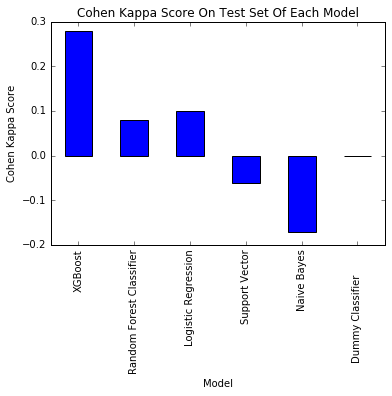

In [69]:
#Accuracy Score
final_test_model_accuracy = final_test_scores['Kappa']

final_test_model_accuracy = final_test_model_accuracy.plot(kind='bar',color=['b','b','b','b','b','r'])
final_test_model_accuracy.set_xlabel("Model")
final_test_model_accuracy.set_ylabel("Cohen Kappa Score")
final_test_model_accuracy.set_title("Cohen Kappa Score On Test Set Of Each Model")

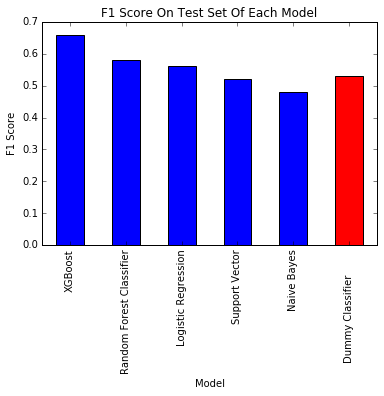

In [70]:
#F1 Score
final_test_model_f1score = final_test_scores['F1 Score']

final_test_model_f1score = final_test_model_f1score.plot(kind='bar',color=['b','b','b','b','b','r'])
final_test_model_f1score.set_xlabel("Model")
final_test_model_f1score.set_ylabel("F1 Score")
final_test_model_f1score.set_title("F1 Score On Test Set Of Each Model")

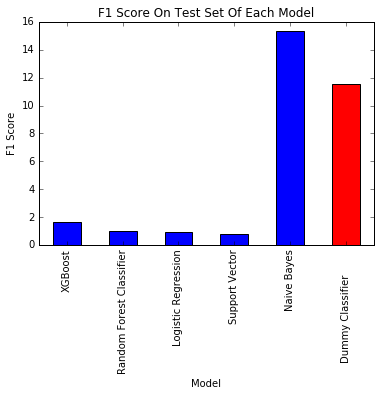

In [71]:
#Log Loss
final_test_model_log_loss = final_test_scores['Log Loss']

final_test_model_log_loss = final_test_model_log_loss.plot(kind='bar',color=['b','b','b','b','b','r'])
final_test_model_log_loss.set_xlabel("Model")
final_test_model_log_loss.set_ylabel("F1 Score")
final_test_model_log_loss.set_title("F1 Score On Test Set Of Each Model")

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix_final_model = pd.DataFrame(confusion_matrix(y_valid_prot,
                                                             xgb_final_classifier.predict(X_valid_kbest_xgb)),
                                            index=['Stage 1','Stage 2','Stage 3'])
confusion_matrix_final_model.columns = ['Stage 1','Stage 2','Stage 3']
confusion_matrix_final_model.index.rename("Actual", inplace = True)
confusion_matrix_final_model.columns.rename("Predicted", inplace = True)
print confusion_matrix_final_model

Predicted  Stage 1  Stage 2  Stage 3
Actual                              
Stage 1          0        2        0
Stage 2          0       16        2
Stage 3          0        4        3


In [73]:
#Focus is far too much on the most populous Stage